In [3]:
import pandas as pd
from neuralNetworkFromScratch import NeuralNetworkFromScratch
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [4]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple multiple classification

In [8]:
from sklearn import datasets

data = datasets.load_iris()

In [9]:
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

In [10]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [12]:
train_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,0.388889,0.375000,0.542373,0.500000
105,0.916667,0.416667,0.949153,0.833333
66,0.361111,0.416667,0.593220,0.583333
0,0.222222,0.625000,0.067797,0.041667
122,0.944444,0.333333,0.966102,0.791667
...,...,...,...,...
71,0.500000,0.333333,0.508475,0.500000
106,0.166667,0.208333,0.593220,0.666667
14,0.416667,0.833333,0.033898,0.041667
92,0.416667,0.250000,0.508475,0.458333


In [11]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [13]:
n_classes = train_y['class'].nunique()

In [20]:
n_classes

3

In [46]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], n_classes], task='multiple_classification', learning_rate=5e-3, n_epochs=40000, print_cost=True, initialization='He')

C:\Users\maicol.nicolini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cost after iteration 0: 0.4549783076288099
Cost after iteration 5000: 0.19192752543419198
Cost after iteration 10000: 0.15266916546341244
Cost after iteration 15000: 0.13348384339777294
Cost after iteration 20000: 0.12113614870209166
Cost after iteration 25000: 0.11213325118461176
Cost after iteration 30000: 0.10509142548913945
Cost after iteration 35000: 0.09933174293894327
Cost after iteration 39999: 0.09447512517841072


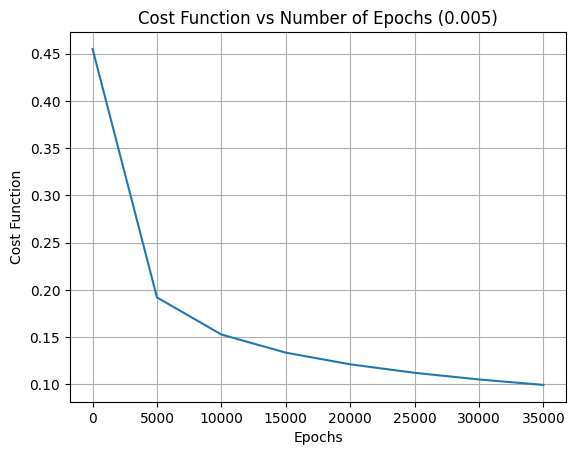

In [51]:
parameters, costs = model.fit(train_x, train_y, print_every=5000, plot_cost_function=True)

In [52]:
pred_train = model.predict(train_x, train_y)

Accuracy: 0.94


In [53]:
a = model.predict(test_x, test_y)

Accuracy: 0.9200000000000002
